In [ ]:
import sys
import atexit

class Logger(object):
    def __init__(self, filename='logfile.log'):
        self.terminal = sys.stdout
        self.log = open(filename, 'a')
        atexit.register(self.log.close)  # Register the file close method to be called when the program exits

    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)

    def flush(self):
        self.terminal.flush()
        self.log.flush()

sys.stdout = Logger('logfile.log')

def example_function():
    print("This message will be logged to the file and printed on the console.")
    for i in range(5):
        print(f"Number: {i}")

if __name__ == '__main__':
    example_function()



In [ ]:
# Function to extract the block index from the block ID string
def extract_block_index(block_id):
    return int(block_id.split('_')[-1])

# Test the function
sample_block_ids = ["1_2_12", "1_2_123", "1_2_1234"]
block_indexes = [extract_block_index(id) for id in sample_block_ids]
block_indexes

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_block_index(block_id):
    return int(block_id.split('_')[-1])
    
def create_latency_plots(df, window_size=20, marker_size=50, GTnumber=-1):
    sns.set(font_scale=1.5)

    # Calculate the rolling average for each unique path (combination of Source and Destination)
    df['Path'] = df['Source'].astype(str) + ' -> ' + df['Destination'].astype(str)
    df['Latency_Rolling_Avg'] = df.groupby('Path')['Latency'].transform(lambda x: x.rolling(window=window_size).mean())
    
    # Metrics for x-axis
    # metrics = ['Arrival Time', 'Block Index', 'Creation Time']
    metrics = ['Arrival Time', 'Creation Time']

    # Create subplots
    fig, axes = plt.subplots(len(metrics), 2, figsize=(18, 18))
    
    for i, metric in enumerate(metrics):
        # Line Plots on the left (column index 0)
        sns.lineplot(x=metric, y='Latency_Rolling_Avg', hue='Path', ax=axes[i, 0], data=df)
        axes[i, 0].set_title(f'Latency Trends Over {metric} (Window Size = {window_size})')
        axes[i, 0].set_xlabel(metric)
        axes[i, 0].set_ylabel('Latency (Rolling Average)')
        
        # Scatter Plots on the right (column index 1)
        sns.scatterplot(x=metric, y='Latency', hue='Path', ax=axes[i, 1], data=df, marker='o', s=marker_size)
        axes[i, 1].set_title(f'Individual Latency Points Over {metric}')
        axes[i, 1].set_xlabel(metric)
        axes[i, 1].set_ylabel('Latency')
        
    # Adjust the layout
    plt.tight_layout()
    # plt.savefig(outputPath + '/pngAllLatencies/' + '{}_gateways_All_Latencies_subplots.png'.format(GTnumber), dpi = 300)
    plt.show()
    plt.close()
    sns.set(font_scale=1.0)


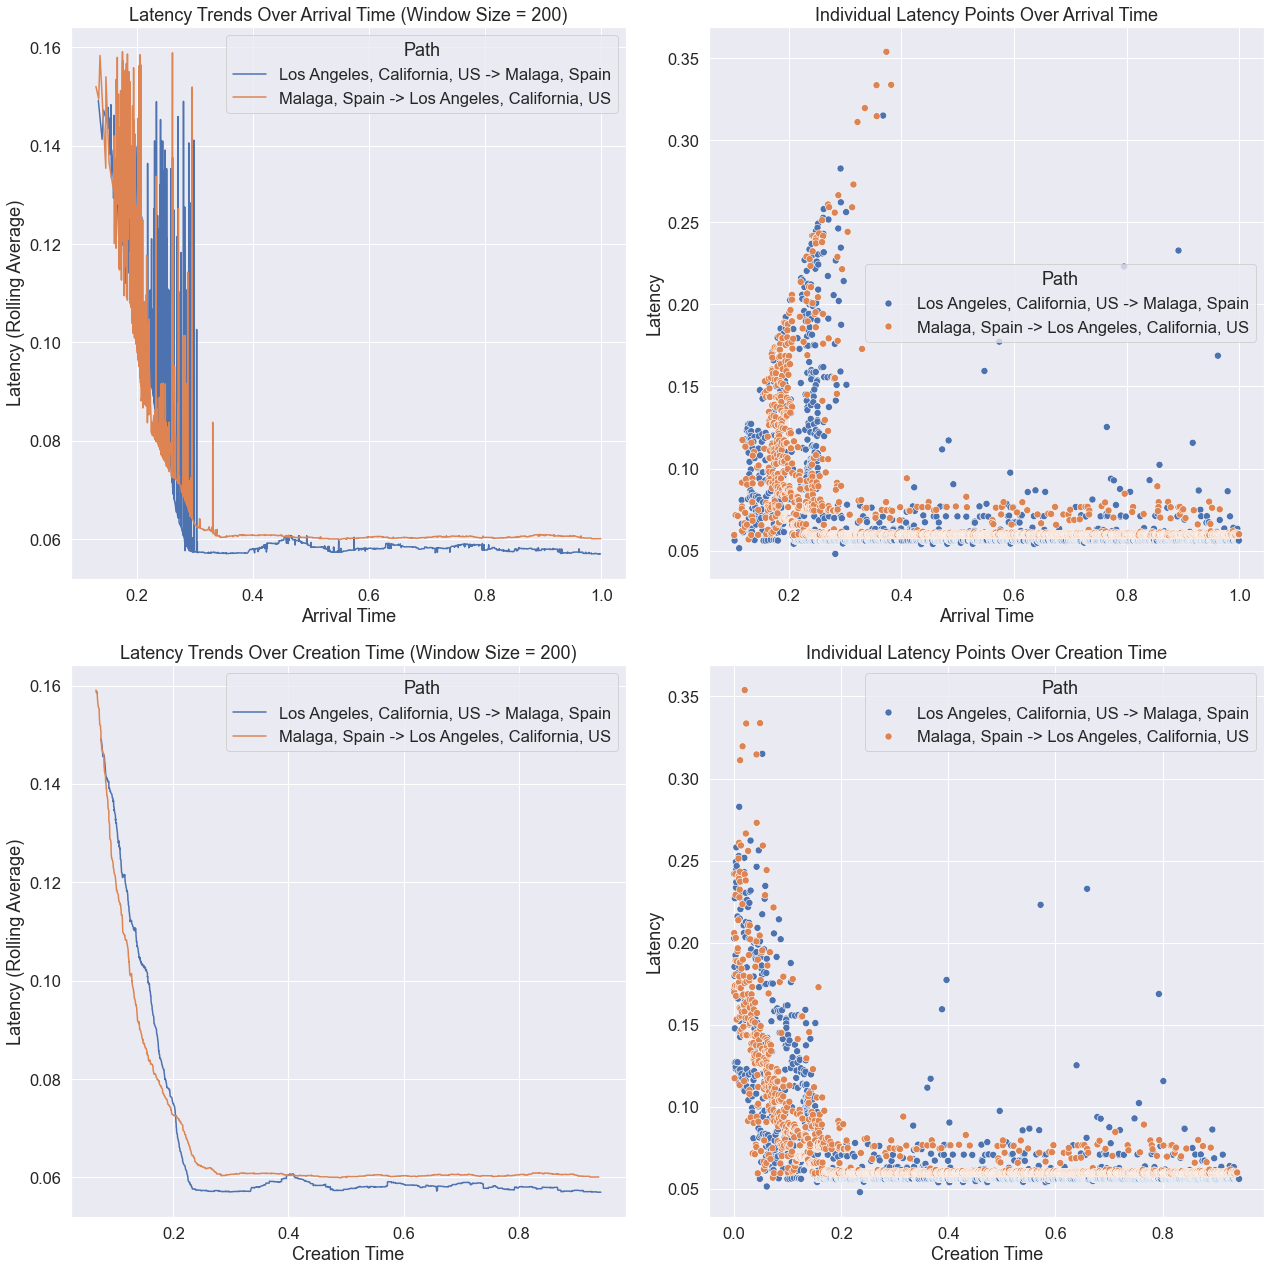

,Unnamed: 0,Creation Time,Latency,Arrival Time,Source,Destination,Block ID,Block Index
7239,2681,0.000000e+00,0.241815,0.241815,"Los Angeles, California, US","Malaga, Spain",1_0_0,0
7240,716,4.368271e-08,0.171093,0.171093,"Los Angeles, California, US","Malaga, Spain",1_0_1,1
7241,1453,7.875971e-05,0.202600,0.202679,"Los Angeles, California, US","Malaga, Spain",1_0_2,2
7242,1112,3.743382e-04,0.185289,0.185663,"Los Angeles, California, US","Malaga, Spain",1_0_3,3
7243,955,6.867385e-04,0.179763,0.180450,"Los Angeles, California, US","Malaga, Spain",1_0_4,4
...,...,...,...,...,...,...,...,...
14891,14860,9.369667e-01,0.060558,0.997524,"Malaga, Spain","Los Angeles, California, US",0_1_2563,2563
14892,14864,9.382163e-01,0.059417,0.997634,"Malaga, Spain","Los Angeles, California, US",0_1_2564,2564
14893,14873,9.382468e-01,0.059958,0.998205,"Malaga, Spain","Los Angeles, California, US",0_1_2565,2565
14894,14878,9.388966e-01,0.059779,0.998676,"Malaga, Spain","Los Angeles, California, US",0_1_2566,2566


In [16]:
# Read the newly uploaded CSV file into a raw DataFrame
df_raw = pd.read_csv('./allLatencies_3_gateways.csv')

# remove aalborg
df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the data block index from the Block ID in the raw DataFrame
df_raw['Block Index'] = df_raw['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200)

df_raw


In [7]:
!dir

 El volumen de la unidad T es DATOS
 El n�mero de serie del volumen es: 6648-9550

 Directorio de t:\Fede\SatNEx_code\tests

17/10/2023  10:17    <DIR>          .
17/10/2023  10:17    <DIR>          ..
09/10/2023  17:39             5.684 allLatencies_2gateways.csv
13/10/2023  03:59         1.806.350 allLatencies_3_gateways.csv
17/10/2023  10:19            15.309 becaria.ipynb
10/10/2023  14:41               124 logfile.log
               4 archivos      1.827.467 bytes
               2 dirs  168.024.330.240 bytes libres
